In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/raw/spiral.csv", header=None, names=["id","label","x","y"])

In [3]:
data.head()

,id,label,x,y
0,1,3,1.000000,0.175652
1,2,3,0.972366,0.153043
2,3,3,0.948187,0.130435
3,4,3,0.922280,0.107826
4,5,3,0.894646,0.092174


In [4]:
points = data[["x","y"]].to_numpy()

In [5]:
import matplotlib.pyplot as plt

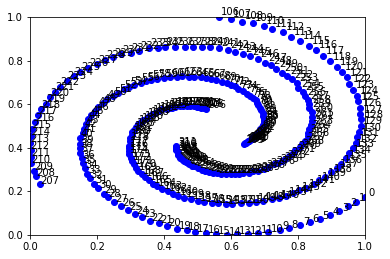

In [6]:
for i in range(len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , i, fontsize=10)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

In [7]:
cluster_n = data[["id","label"]].groupby("label").count().to_dict()

In [8]:
cluster_n["id"]

{1: 101, 2: 105, 3: 106}

In [9]:
data["label"].unique()

array([3, 1, 2])

In [10]:
po_grouped_df = data.groupby(["label"], as_index=False)

In [28]:
order_mat = []
max_iter = max([len(ct) for l, ct in po_grouped_df])
mat_num = [ct[["label","x","y"]][::-1].to_records() for l, ct in po_grouped_df]
# for i in range(max_iter):
#     order_mat.append([ ct.iloc[i] for l, ct in po_grouped_df])


In [29]:
mat_num

[rec.array([(206, 1, 0.52504318, 0.57913043),
            (205, 1, 0.51813472, 0.58086957),
            (204, 1, 0.51122625, 0.58434783),
            (203, 1, 0.50604491, 0.58608696),
            (202, 1, 0.49740933, 0.58782609),
            (201, 1, 0.49050086, 0.59130435),
            (200, 1, 0.47841105, 0.59130435),
            (199, 1, 0.46804836, 0.59130435),
            (198, 1, 0.45595855, 0.59130435),
            (197, 1, 0.44732297, 0.59130435),
            (196, 1, 0.43350604, 0.58956522),
            (195, 1, 0.42314335, 0.58434783),
            (194, 1, 0.41450777, 0.58434783),
            (193, 1, 0.40932642, 0.57913043),
            (192, 1, 0.3955095 , 0.5773913 ),
            (191, 1, 0.3851468 , 0.56869565),
            (190, 1, 0.37305699, 0.56173913),
            (189, 1, 0.36442142, 0.55478261),
            (188, 1, 0.35578584, 0.54608696),
            (187, 1, 0.34887737, 0.53913043),
            (186, 1, 0.33851468, 0.52695652),
            (185, 1, 0.3298791 , 0

In [30]:
reorder_mat = []
for i in range(max_iter):
    for item in mat_num:
        if i < len(item):
            reorder_mat.append(item[i])
reorder_mat = np.array(reorder_mat)

In [31]:
reorder_mat

array([(206, 1, 0.52504318, 0.57913043), (311, 2, 0.43696028, 0.40695652),
       (105, 3, 0.63903282, 0.4173913 ), (205, 1, 0.51813472, 0.58086957),
       (310, 2, 0.43696028, 0.40347826), (104, 3, 0.64075993, 0.42086957),
       (204, 1, 0.51122625, 0.58434783), (309, 2, 0.43696028, 0.39478261),
       (103, 3, 0.64421416, 0.4226087 ), (203, 1, 0.50604491, 0.58608696),
       (308, 2, 0.43696028, 0.38782609), (102, 3, 0.64766839, 0.42608696),
       (202, 1, 0.49740933, 0.58782609), (307, 2, 0.44041451, 0.38086957),
       (101, 3, 0.65112263, 0.42956522), (201, 1, 0.49050086, 0.59130435),
       (306, 2, 0.44214162, 0.37391304), (100, 3, 0.65284974, 0.43130435),
       (200, 1, 0.47841105, 0.59130435), (305, 2, 0.44214162, 0.36869565),
       ( 99, 3, 0.65630397, 0.43478261), (199, 1, 0.46804836, 0.59130435),
       (304, 2, 0.44559585, 0.36521739), ( 98, 3, 0.66148532, 0.44      ),
       (198, 1, 0.45595855, 0.59130435), (303, 2, 0.44732297, 0.36      ),
       ( 97, 3, 0.6632124

In [39]:
pd.DataFrame.from_records(reorder_mat).to_csv("spiral_sorted_inverse.csv",index=False)

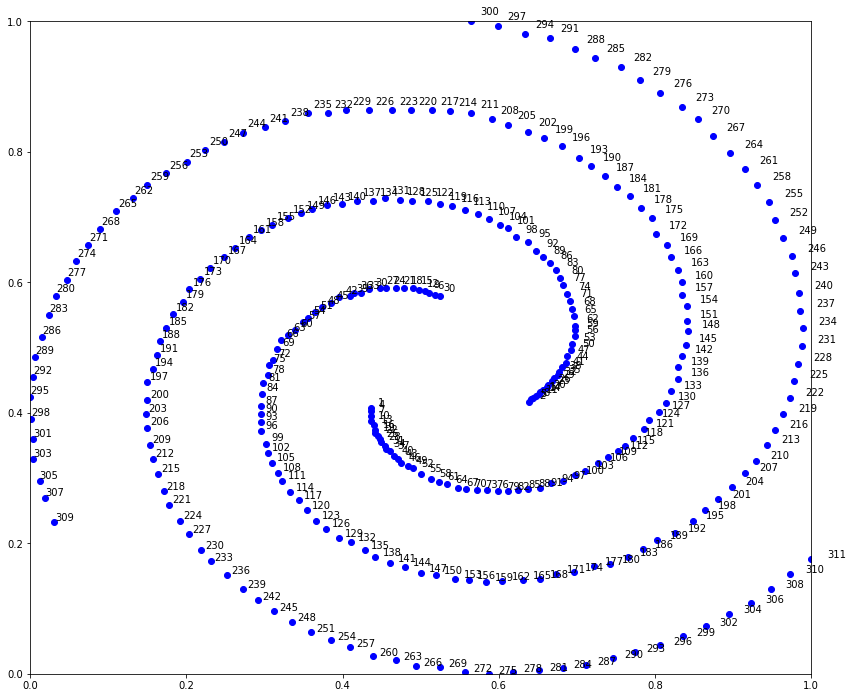

In [38]:
points = reorder_mat
plt.figure(figsize=(14, 12))
for i in range(len(points)):
    x = points[i][2]
    y = points[i][3]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.02), y * (1 + 0.01) , i, fontsize=10)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

In [ ]:
# Copyright 2022 Xin Han
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     http://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

